In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install openpyxl

In [ ]:
personal_data = pd.read_excel('/content/Medibuddy insurance data personal details (1) (2).xlsx')
price_data = pd.read_excel('/content/Medibuddy Insurance Data Price (1) (2).xlsx')

# Merge the datasets on Policy number
data = pd.merge(personal_data, price_data, on='Policy no.',how="inner")


In [ ]:
df=data.copy()

In [ ]:
data

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.400,1826.84300
1,PLC157033,1,no,southwest,19,male,24.600,1837.23700
2,PLC157060,0,no,southwest,56,male,40.300,10602.38500
3,PLC157087,1,no,southwest,30,female,32.400,4149.73600
4,PLC157186,5,no,southwest,19,female,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,northeast,39,male,29.925,22462.04375
1334,PLC168436,0,yes,northeast,18,female,21.660,14283.45940
1335,PLC168634,2,yes,northeast,42,male,24.605,21259.37795
1336,PLC168652,0,yes,northeast,29,female,21.850,16115.30450


In [ ]:
data.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.843
1,PLC157033,1,no,southwest,19,male,24.6,1837.237
2,PLC157060,0,no,southwest,56,male,40.3,10602.385
3,PLC157087,1,no,southwest,30,female,32.4,4149.736
4,PLC157186,5,no,southwest,19,female,28.6,4687.797


In [ ]:
data.shape

(1338, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [ ]:
data.isnull().sum()

,0
Policy no.,0
children,0
smoker,0
region,0
age,0
sex,0
bmi,0
charges in INR,0


In [ ]:
data.describe()

,children,age,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.094918,39.207025,30.663397,13270.422265
std,1.205493,14.049960,6.098187,12110.011237
min,0.000000,18.000000,15.960000,1121.873900
25%,0.000000,27.000000,26.296250,4740.287150
50%,1.000000,39.000000,30.400000,9382.033000
75%,2.000000,51.000000,34.693750,16639.912515
max,5.000000,64.000000,53.130000,63770.428010


# **1. Does the gender of the person matter for the company as a constraint for extending policies?**

In [ ]:
gender_analysis = data.groupby("sex")["charges in INR"].mean()
print(gender_analysis)

sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64


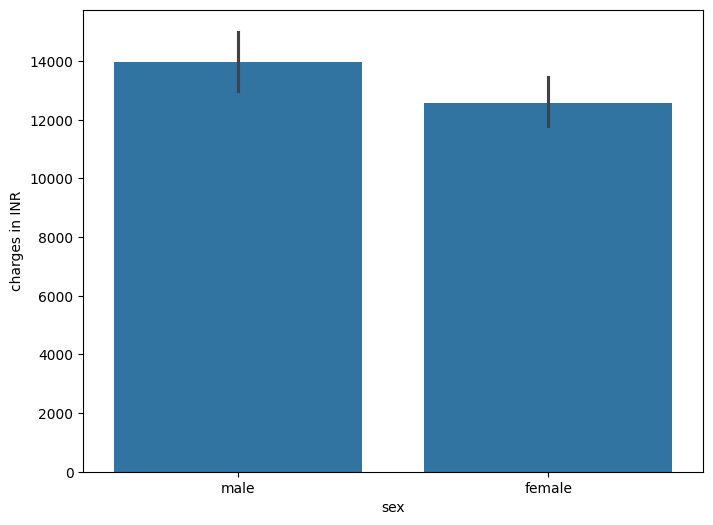

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=data, x='sex', y='charges in INR')
plt.show()

Since the difference in charges is small gender should not be a strict constraint in extending policies. So the company does not need to offer separate policies based on gender.

# **2. What is the average amount of money the company spent over each policy cover?**

In [ ]:
average_spent = data["charges in INR"].mean()
print(f"Average amount spent per policy: {average_spent:.2f} INR")

Average amount spent per policy: 13270.42 INR


# **3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?**

In [ ]:
region_analysis = data.groupby("region")["charges in INR"].mean()
print(region_analysis)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges in INR, dtype: float64


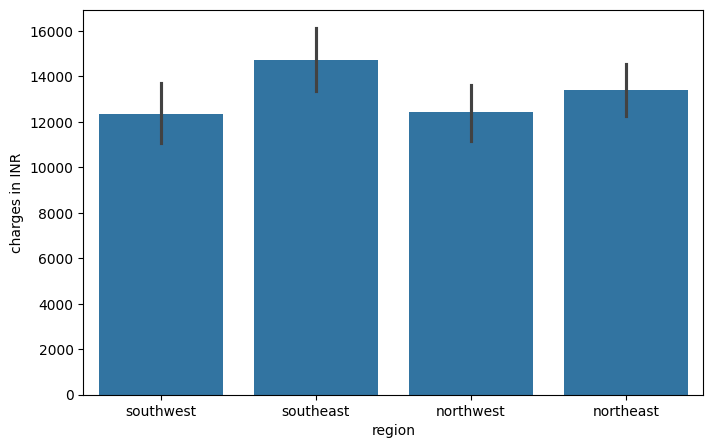

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='region', y='charges in INR')
plt.show()

The company may consider region-based pricing.

*   Northeast has higher claims on average, so premiums might  be adjusted higher.
*   Southeast and Southwest have lower claims, so lower premium policies could be offered there.





# **4. Does the no. of dependents make a difference in the amount claimed?**

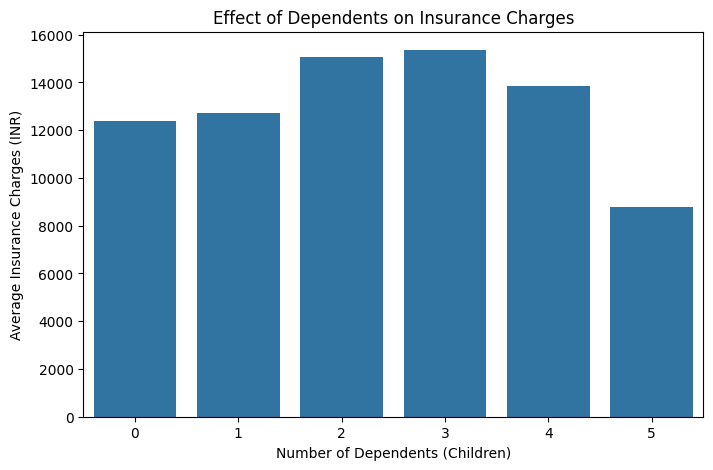

In [ ]:
children_analysis = data.groupby("children")["charges in INR"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=children_analysis.index, y=children_analysis.values)
plt.xlabel("Number of Dependents (Children)")
plt.ylabel("Average Insurance Charges (INR)")
plt.title("Effect of Dependents on Insurance Charges")
plt.show()

The average insurance charges increase as the number of dependents rises from 0 to 3. Families with 2-3 dependents have the highest average insurance charges. The charges slightly decrease at 4 dependents. At 5 dependents, there is a sharp drop, which is unexpected.
Thus the info is not sufficient for us to make a difference in the amount claimed.





# **5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?**

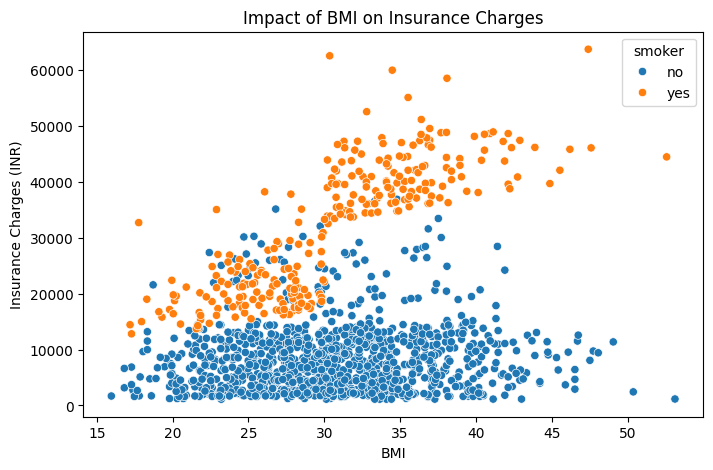

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["bmi"], y=data["charges in INR"], hue=data["smoker"])
plt.xlabel("BMI")
plt.ylabel("Insurance Charges (INR)")
plt.title("Impact of BMI on Insurance Charges")
plt.show()

BMI alone is not the strongest predictor; smoking status plays a huge role. The effect of BMI on insurance charges is more significant for smokers.

# **6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?**

In [ ]:
smoker_analysis = data.groupby("smoker")["charges in INR"].mean()
print(smoker_analysis)

smoker
no      8434.268298
yes    32050.231832
Name: charges in INR, dtype: float64


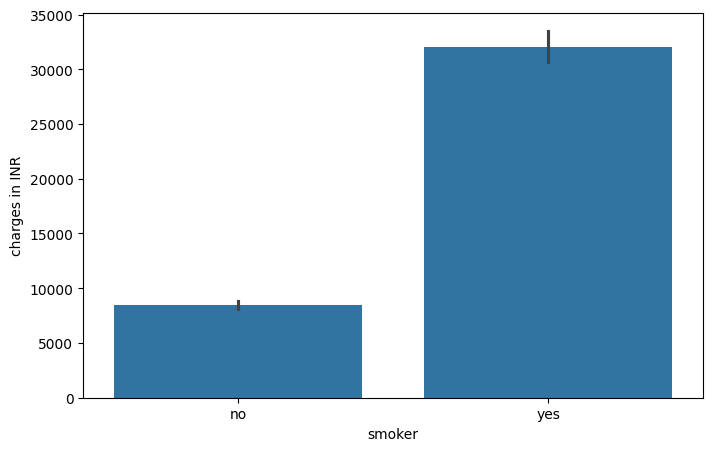

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='smoker', y='charges in INR')
plt.show()

Smoking status is a major factor affecting insurance claims.

*   Smokers should have higher premiums due to their higher medical costs.
*   Non-smokers have significantly lower insurance charges.

# **7. Does age have any barrier on the insurance claimed?**

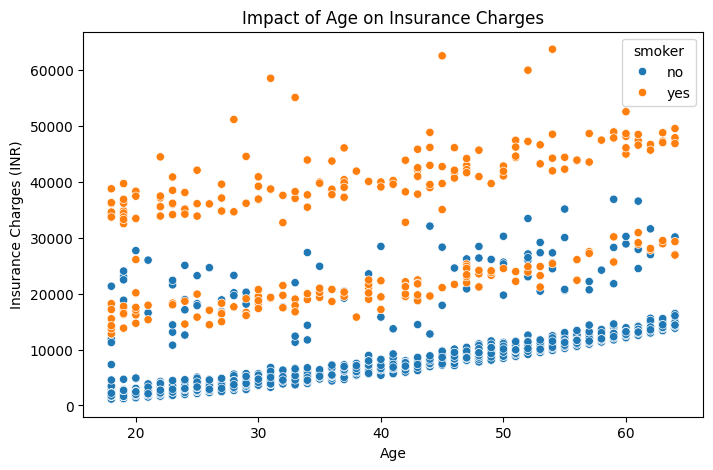

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["age"], y=data["charges in INR"], hue=data["smoker"])
plt.xlabel("Age")
plt.ylabel("Insurance Charges (INR)")
plt.title("Impact of Age on Insurance Charges")
plt.show()

Age is a major factor affecting insurance costs.

*   Older individuals have higher insurance claims, likely due to increased health risks.
*   Smoking accelerates cost increase, meaning older smokers have the highest insurance charges.






# **8. Can the company extend certain discounts after checking BMI in this case?**

In [ ]:
# Define BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.9:
        return "Normal"
    elif 25 <= bmi <= 29.9:
        return "Overweight"
    else:
        return "Obese"

data["bmi_category"] = data["bmi"].apply(bmi_category)

# Compare average charges by BMI category
bmi_analysis = data.groupby("bmi_category")["charges in INR"].mean()
print(bmi_analysis)

bmi_category
Normal         10379.499732
Obese          15479.549773
Overweight     10993.994037
Underweight     8852.200585
Name: charges in INR, dtype: float64


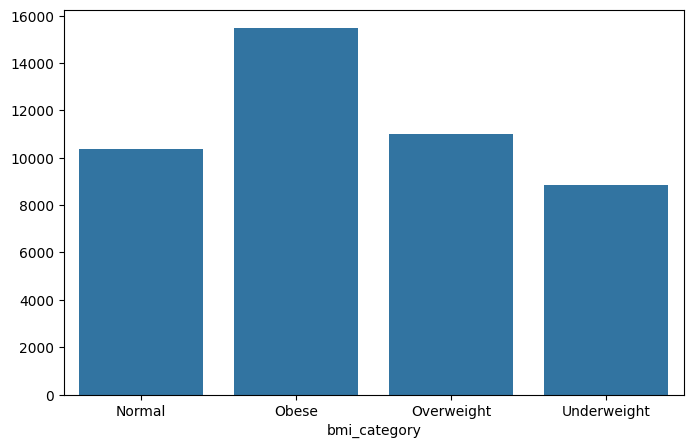

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=bmi_analysis.index, y=bmi_analysis.values)
plt.show()

Obese Individuals Have the Highest Insurance Charges. Underweight Individuals Have the Lowest Charges. Overweight and Normal BMI Groups Have Similar Charges.

In [ ]:
df.columns

Index(['Policy no.', 'children', 'smoker', 'region', 'age', 'sex', 'bmi',
       'charges in INR'],
      dtype='object')

In [ ]:
df['smoker'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df["charges in INR"]))

# Count Outliers
outliers = (z_scores > 3).sum()
print(f"Total Outliers Detected (Z-score > 3): {outliers}")

Total Outliers Detected (Z-score > 3): 7


In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df["bmi"]))

# Count Outliers
outliers = (z_scores > 3).sum()
print(f"Total Outliers Detected (Z-score > 3): {outliers}")

Total Outliers Detected (Z-score > 3): 4


In [ ]:
# Define Capping Limits
lower_limit_charges, upper_limit_charges = np.percentile(df["charges in INR"], [1, 99])
lower_limit_bmi, upper_limit_bmi = np.percentile(df["bmi"], [1, 99])

# Apply Capping
df["charges in INR"] = np.clip(df["charges in INR"], lower_limit_charges, upper_limit_charges)
df["bmi"] = np.clip(df["bmi"], lower_limit_bmi, upper_limit_bmi)

print("Capping applied successfully!")

Capping applied successfully!


<function matplotlib.pyplot.show(close=None, block=None)>

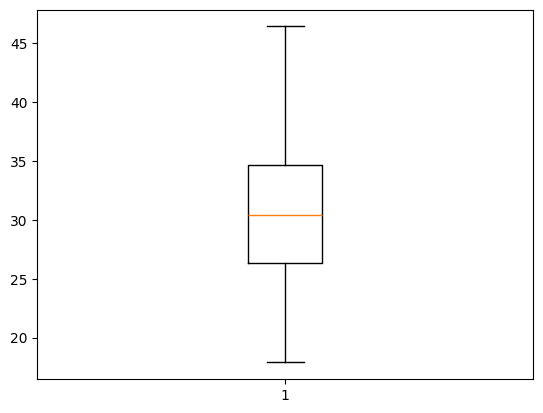

In [ ]:
plt.boxplot(df["bmi"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

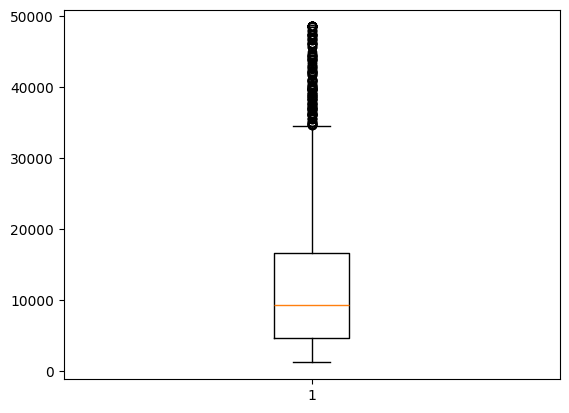

In [ ]:
plt.boxplot(df["charges in INR"])
plt.show

In [ ]:
#writing user defined function to remove the outlier.
def remove_outlier(d,c):
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)

    iqr=q3-q1

    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    output=d[(d[c]>lb)&(d[c]<ub)]
    return output

<function matplotlib.pyplot.show(close=None, block=None)>

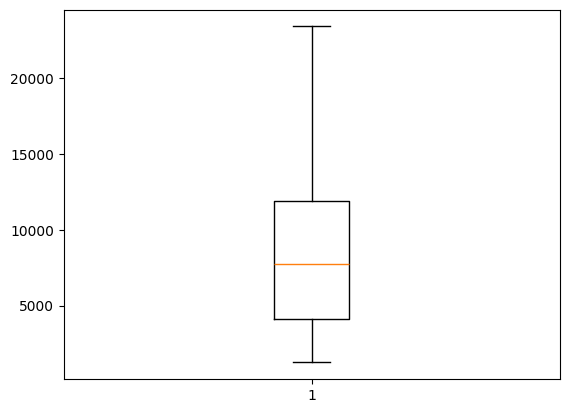

In [ ]:
df=remove_outlier(df,"charges in INR")
plt.boxplot(df["charges in INR"])
plt.show

In [ ]:
df_categorical=df.select_dtypes(include=["object"])
df_categorical

,Policy no.,smoker,region,sex
0,PLC157006,no,southwest,male
1,PLC157033,no,southwest,male
2,PLC157060,no,southwest,male
3,PLC157087,no,southwest,female
4,PLC157186,no,southwest,female
...,...,...,...,...
1331,PLC168148,yes,northeast,male
1333,PLC168400,yes,northeast,male
1334,PLC168436,yes,northeast,female
1335,PLC168634,yes,northeast,male


In [ ]:
df.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.843
1,PLC157033,1,no,southwest,19,male,24.6,1837.237
2,PLC157060,0,no,southwest,56,male,40.3,10602.385
3,PLC157087,1,no,southwest,30,female,32.4,4149.736
4,PLC157186,5,no,southwest,19,female,28.6,4687.797


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df.columns

Index(['Policy no.', 'children', 'smoker', 'region', 'age', 'sex', 'bmi',
       'charges in INR'],
      dtype='object')

In [ ]:
# Select features and target variable
x = df[['children','smoker','region','age','sex','bmi']]
y = df['charges in INR']


In [ ]:
#check x and y
print(x.shape,y.shape)

(1116, 6) (1116,)


In [ ]:
# Encoding categorical columns (One-Hot Encoding)
categorical_features = ['smoker', 'region', 'sex']
numerical_features = ['age', 'bmi', 'children']

# Preprocessing Pipelines
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

# Combine Transformers
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(892, 6) (224, 6) (892,) (224,)


In [ ]:
# Define a dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, objective="reg:squarederror")
}

In [ ]:
!pip install --upgrade xgboost


In [ ]:
!pip install scikit-learn==1.1.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.
bigframes 1.34.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
# Store results
results = []

# Train & Evaluate Each Model
for name, model in models.items():
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train Model
    pipeline.fit(x_train, y_train)

    # Predictions
    y_pred = pipeline.predict(x_test)

    # Calculate Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append results
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    })

# Convert Results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

               Model          MAE           MSE         RMSE  R² Score
0  Linear Regression  1558.081872  8.973607e+06  2995.597935  0.700977
1      Decision Tree  1506.949672  1.492509e+07  3863.300997  0.502659
2      Random Forest  1404.294290  1.057323e+07  3251.650613  0.647674
3  Gradient Boosting  1483.450238  9.623468e+06  3102.171536  0.679322
4            XGBoost  1707.965717  1.250005e+07  3535.540458  0.583467


In [ ]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

Length of y_test: 224
Length of y_pred: 224


In [ ]:
# Combine the actual and predicted charges into a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the DataFrame to see the comparison
print(comparison_df.head())

           Actual     Predicted
1034   2899.48935   3851.112793
103    8825.08600   8381.411133
502    8582.30230  13363.309570
895   23288.92840   3197.607910
1244  18310.74200  18831.347656
